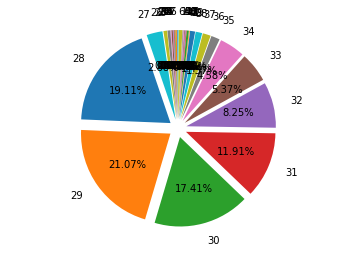

In [1]:
import vk
import time
import matplotlib.pyplot as plt
from collections import defaultdict
from datetime import datetime, date

token = ''
session = vk.Session(token)
vk_api = vk.API(session)


group = vk_api.groups.getById(group_id='nakedsci', fields='members_count', version = vk.version)

sizes = defaultdict(int)
date = datetime.today()

for i in range((group[0]['members_count'] + 999) // 1000): #569K users
    members_id = vk_api.groups.getMembers(group_id='nakedsci', count=1000, offset = 1000 * i, version = vk.version)
    time.sleep(0.3)
    members = vk_api.users.get(user_ids=members_id['users'], fields='bdate', version=vk.version)

    for member in members:
        if 'bdate' in member:
            birthday = member['bdate'].split('.')
            if len(birthday) == 3:

                if int(birthday[0]) == date.day and int(birthday[1]) == date.month:
                    sizes[date.year - int(birthday[2])] += 1
                else:
                    sizes[date.year - int(birthday[2]) - 1] += 1


labels = [value for value in sizes]
sizes_l = [sizes[key] for key in sizes ]

explode = [0.1 for i in sizes]  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes_l, explode=explode, labels=labels, labeldistance=1.2, autopct='%1.2f%%',
        shadow=False, startangle=90)
ax1.axis('equal')
plt.show()
